<a href="https://colab.research.google.com/github/Elberthyindas/CMSC-204-fall-2025/blob/main/Copy_of_DATA_201_PROJECT_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA201 Project 3 — Crash Reporting (Drivers)
## Predicting "Driver At Fault" using Decision Trees and Random Forest

**Dataset:** Crash_Reporting_-_Drivers_Data_20251214.csv  
**Goal:** Build and compare models to predict whether a driver was at fault.

**Group 4:**

**Lydia**

**steve**

**Elberth**


## **About The Dataset**


**Report Number**: 	             Unique identifier for the crash report

**Local Case Number**:           	Local jurisdiction’s case number for the crash

**Driver ID	Identifier**:         for each driver involved in the crash

**Vehicle ID	Identifier** :       linking the driver to a specific vehicle

**Latitude**: 	Latitude coordinate of the crash location

**Longitude**: 	Longitude coordinate of the crash location

**Municipality:**	City or town where the crash occurred

**Route Type**:	Type of roadway (e.g., State Highway, County Road, Local Road)

**Road Name:**	Name of the road where the crash occurred

**Crash Date/Time:**	Date and time when the crash occurred

**crash_hour**:	Hour of day extracted from crash time (0–23)

**crash_dayofweek**:	Day of week extracted from crash date (0 = Monday)
crash_month	Month extracted from crash date (1–12)

**Vehicle Year**:	Model year of the vehicle

**Vehicle Make:**	Manufacturer of the vehicle

**Vehicle Model:**	Model name of the vehicle

**Vehicle Body Type:**	Type of vehicle (e.g., sedan, SUV, truck)

**Speed Limit	Posted:** speed limit at the crash location

**Driver Substance Abuse:**	Indicates suspected alcohol or drug involvement

**Driver Distracted**: By	Whether the driver was distracted (e.g., phone, passenger)

**Driver At Fault:**	Indicates whether the driver was determined to be at fault (Target Variable)

**Driver Injury Severity:**	Severity of injuries sustained by the driver


**Weather:**	Weather condition at time of crash (e.g., Clear, Rain, Snow)

**Light:**	Lighting condition (e.g., Daylight, Dark, Dusk)

**Surface Condition**	Road surface condition (e.g., Dry, Wet, Icy)

**Traffic Control:** 	Traffic control device present (e.g., Stop Sign, Signal, None)

**Collision Type:**	Type of collision (e.g., Rear-end, Angle, Head-on)

**Road Alignment:**	Road shape or alignment (e.g., Straight, Curve)

**Road Condition:**	Overall condition of the roadway

For this project, we analyzed the Crash Reporting Drivers Data dataset, which contains thousands of records describing drivers involved in traffic crashes.

Each row represents a driver in a crash, and the dataset includes information such as weather conditions, lighting, road surface, collision type, speed limit, vehicle year, and whether the driver was at fault.

The main goal of this project was to understand which crash conditions are associated with driver fault and to determine whether we can predict driver fault.

In [ ]:
#LIBRARIES


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)


In [ ]:


# import dataset
df = pd.read_csv("/content/Crash_Reporting_-_Drivers_Data_20251214.csv", low_memory=False, on_bad_lines='skip')
df

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,MCP22910095,250055256,MONTGOMERY,Injury Crash,12/10/2025 03:30:00 PM,Maryland (State) Route,NaN,ARDNAVE PL,NaN,NaN,...,NaN,35,No,No,2014,HONDA,ACCORD,39.033346,-77.237084,"(39.03334633, -77.2370845)"
1,MCP22910095,250055256,MONTGOMERY,Injury Crash,12/10/2025 03:30:00 PM,Maryland (State) Route,NaN,ARDNAVE PL,NaN,NaN,...,NaN,35,No,No,2014,CHEVROLET,EXPRESS,39.033346,-77.237084,"(39.03334633, -77.2370845)"
2,DD56570033,250055211,ROCKVILLE,Injury Crash,12/10/2025 11:35:00 AM,Maryland (State) Route,VEIRS MILL RD (WB/L),NaN,NaN,NaN,...,Eastbound,35,No,No,2023,TOYOTA,CROWN,39.075529,-77.117221,"(39.07552929, -77.11722144)"
3,MCP2866009B,250055243,MONTGOMERY,Property Damage Crash,12/10/2025 11:35:00 AM,NaN,NaN,NaN,Parking Aisle IN THE NEW VEHICLE PARKIN...,NaN,...,Unknown,0,No,No,2014,DODGE,CHARGER,39.066362,-77.159883,"(39.06636226, -77.15988321)"
4,DD56570033,250055211,ROCKVILLE,Injury Crash,12/10/2025 11:35:00 AM,Maryland (State) Route,VEIRS MILL RD (WB/L),NaN,NaN,NaN,...,Southbound,35,No,No,2013,NISSAN,ROGUE,39.075529,-77.117221,"(39.07552929, -77.11722144)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207448,MCP2783000G,15000025,Montgomery County Police,Injury Crash,01/01/2015 01:14:00 AM,Maryland (State),NORBECK RD,BAUER DR,NaN,NaN,...,West,40,No,No,2002,TOYOTA,CAMRY,39.096217,-77.109803,"(39.09621667, -77.10980333)"
207449,MCP2686000D,15000017,Montgomery County Police,Property Damage Crash,01/01/2015 01:10:00 AM,Ramp,RAMP 5 FR RAMP 8 TO FATHER HURLEY BLVD,FATHER HURLEY BLVD,NaN,NaN,...,South,40,No,No,2010,FORD,FOCUS,39.196610,-77.265547,"(39.19661, -77.26554667)"
207450,MCP2686000D,15000017,Montgomery County Police,Property Damage Crash,01/01/2015 01:10:00 AM,Ramp,RAMP 5 FR RAMP 8 TO FATHER HURLEY BLVD,FATHER HURLEY BLVD,NaN,NaN,...,North,40,No,No,2007,JEEP,COMPASS,39.196610,-77.265547,"(39.19661, -77.26554667)"
207451,MCP11520005,15000008,Montgomery County Police,Property Damage Crash,01/01/2015 12:30:00 AM,Maryland (State),ROCKVILLE PIKE,GROSVENOR LA,NaN,NaN,...,North,35,No,No,1993,BUICK,4S,39.022001,-77.102673,"(39.02200107, -77.10267305)"


**EDA & VISUALIZATION**

In [ ]:
# Time features
df["Crash Date/Time"] = pd.to_datetime(df["Crash Date/Time"], errors="coerce")
df["crash_hour"] = df["Crash Date/Time"].dt.hour
df["crash_dayofweek"] = df["Crash Date/Time"].dt.dayofweek
df["crash_month"] = df["Crash Date/Time"].dt.month

# Target
TARGET = "Driver At Fault"
df = df.dropna(subset=[TARGET]).copy()

print(df[TARGET].value_counts(dropna=False))


Driver At Fault
Yes        104294
No          98477
Unknown      4682
Name: count, dtype: int64


In [ ]:
categorical_cols = [
    "Collision Type", "Weather", "Surface Condition", "Light",
    "Traffic Control", "Driver Substance Abuse", "Route Type", "Municipality"
]

numeric_candidates = ["Speed Limit", "Vehicle Year", "Latitude", "Longitude",
                      "crash_hour", "crash_dayofweek", "crash_month"]

# Keep only columns that exist (prevents errors)
categorical_cols = [c for c in categorical_cols if c in df.columns]
numeric_cols = [c for c in numeric_candidates if c in df.columns]

FEATURES = categorical_cols + numeric_cols

X = df[FEATURES].copy()
y = df[TARGET].copy()

print("Features:", FEATURES)



Features: ['Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Route Type', 'Municipality', 'Speed Limit', 'Vehicle Year', 'Latitude', 'Longitude', 'crash_hour', 'crash_dayofweek', 'crash_month']
X shape: (207453, 15)


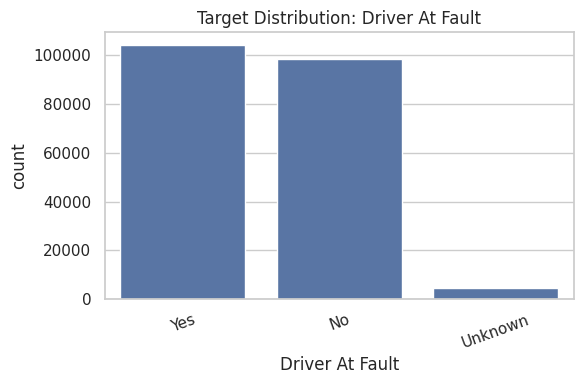

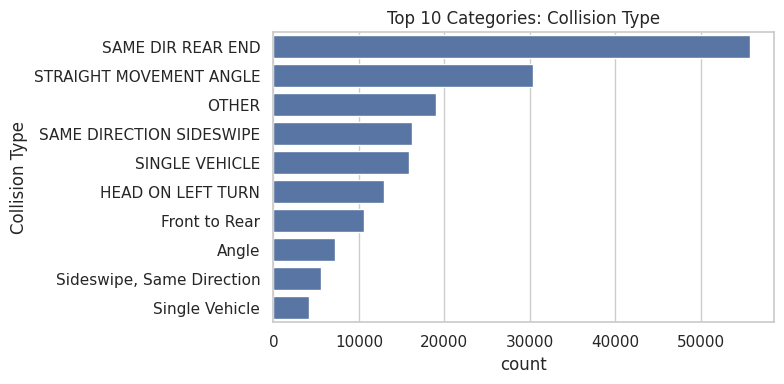

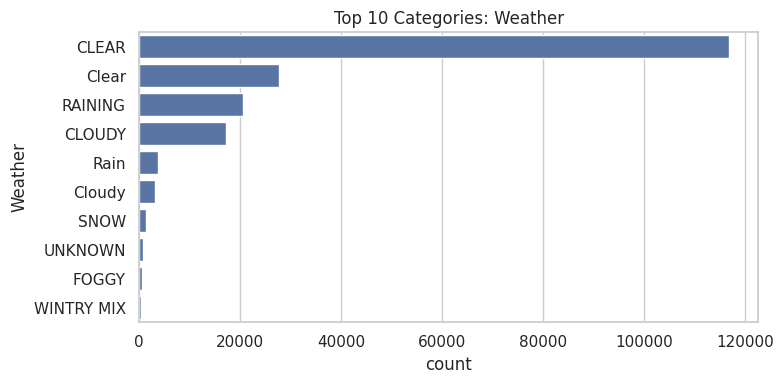

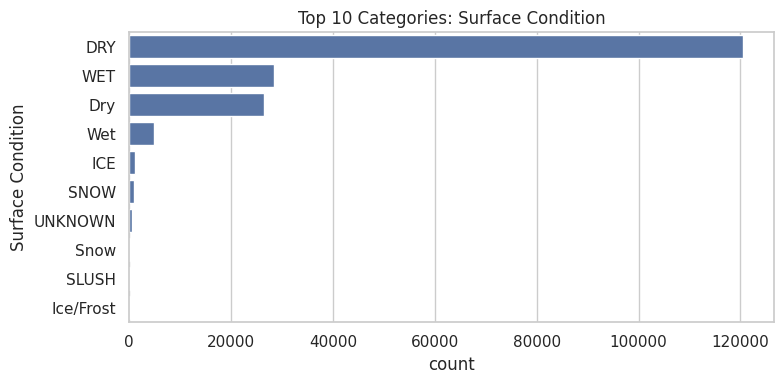

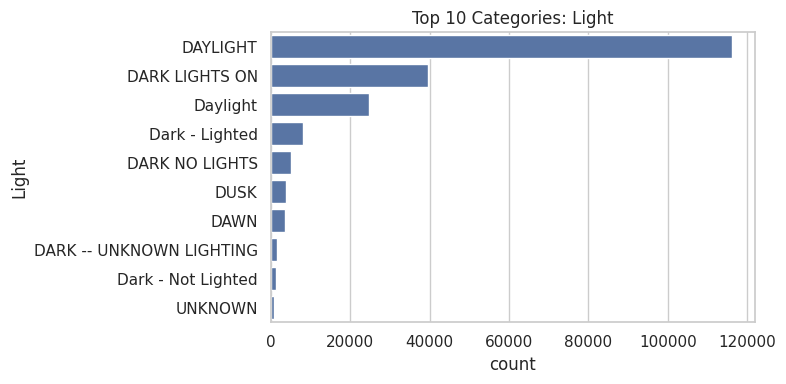

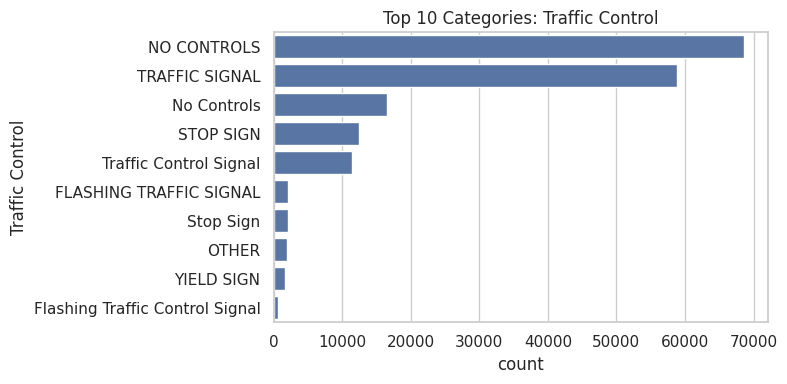

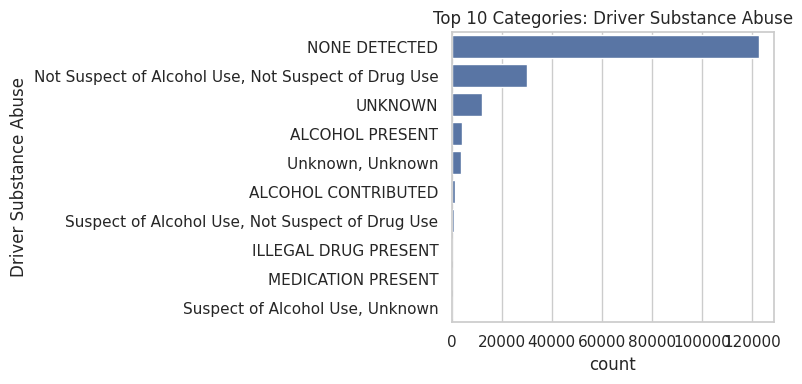

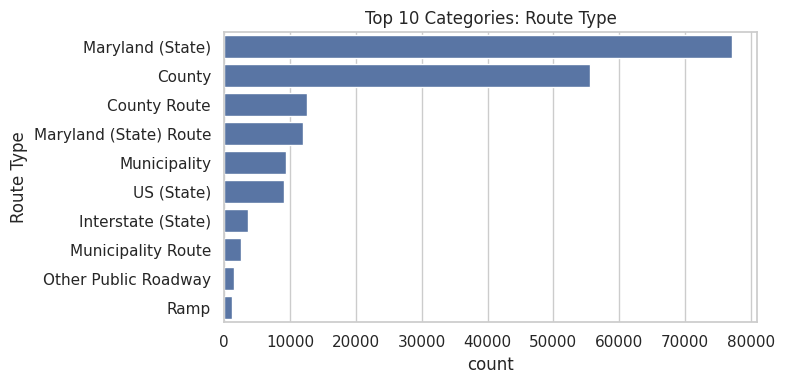

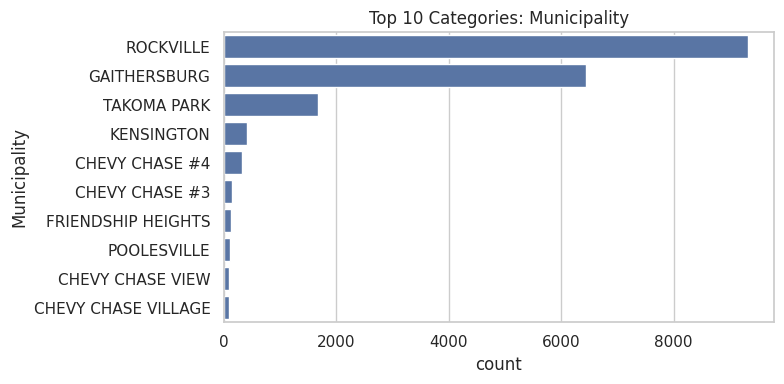

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=TARGET, order=df[TARGET].value_counts().index)
plt.title("Target Distribution: Driver At Fault")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Top categories per variable to keep plots readable (Categorical)
TOP_N = 10
for col in categorical_cols:
    top = df[col].value_counts().head(TOP_N).index
    plt.figure(figsize=(8,4))
    sns.countplot(data=df[df[col].isin(top)], y=col, order=top)
    plt.title(f"Top {TOP_N} Categories: {col}")
    plt.tight_layout()
    plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (165962, 15) Test: (41491, 15)


In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ],
    remainder="drop"
)


In [ ]:
dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    max_depth=8,
    min_samples_leaf=50,
    class_weight="balanced"
)

dt_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("dt", dt)
])

dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Balanced Accuracy:", balanced_accuracy_score(y_test, dt_pred))
print("Decision Tree Macro F1:", f1_score(y_test, dt_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.4171507073823239
Decision Tree Balanced Accuracy: 0.5414943913970408
Decision Tree Macro F1: 0.35695552785473345

Classification Report:
               precision    recall  f1-score   support

          No       0.61      0.56      0.59     19696
     Unknown       0.04      0.80      0.08       936
         Yes       0.84      0.26      0.40     20859

    accuracy                           0.42     41491
   macro avg       0.50      0.54      0.36     41491
weighted avg       0.72      0.42      0.48     41491



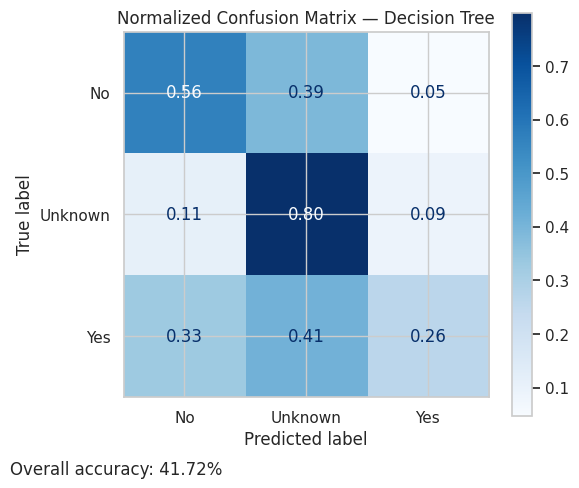

In [ ]:
labels = dt_model.named_steps["dt"].classes_
cm = confusion_matrix(y_test, dt_pred, labels=labels, normalize="true")

fig, ax = plt.subplots(figsize=(6,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format=".2f")
ax.set_title("Normalized Confusion Matrix — Decision Tree")
fig.text(0.02, 0.01, f"Overall accuracy: {accuracy_score(y_test, dt_pred)*100:.2f}%")
plt.tight_layout()
plt.show()


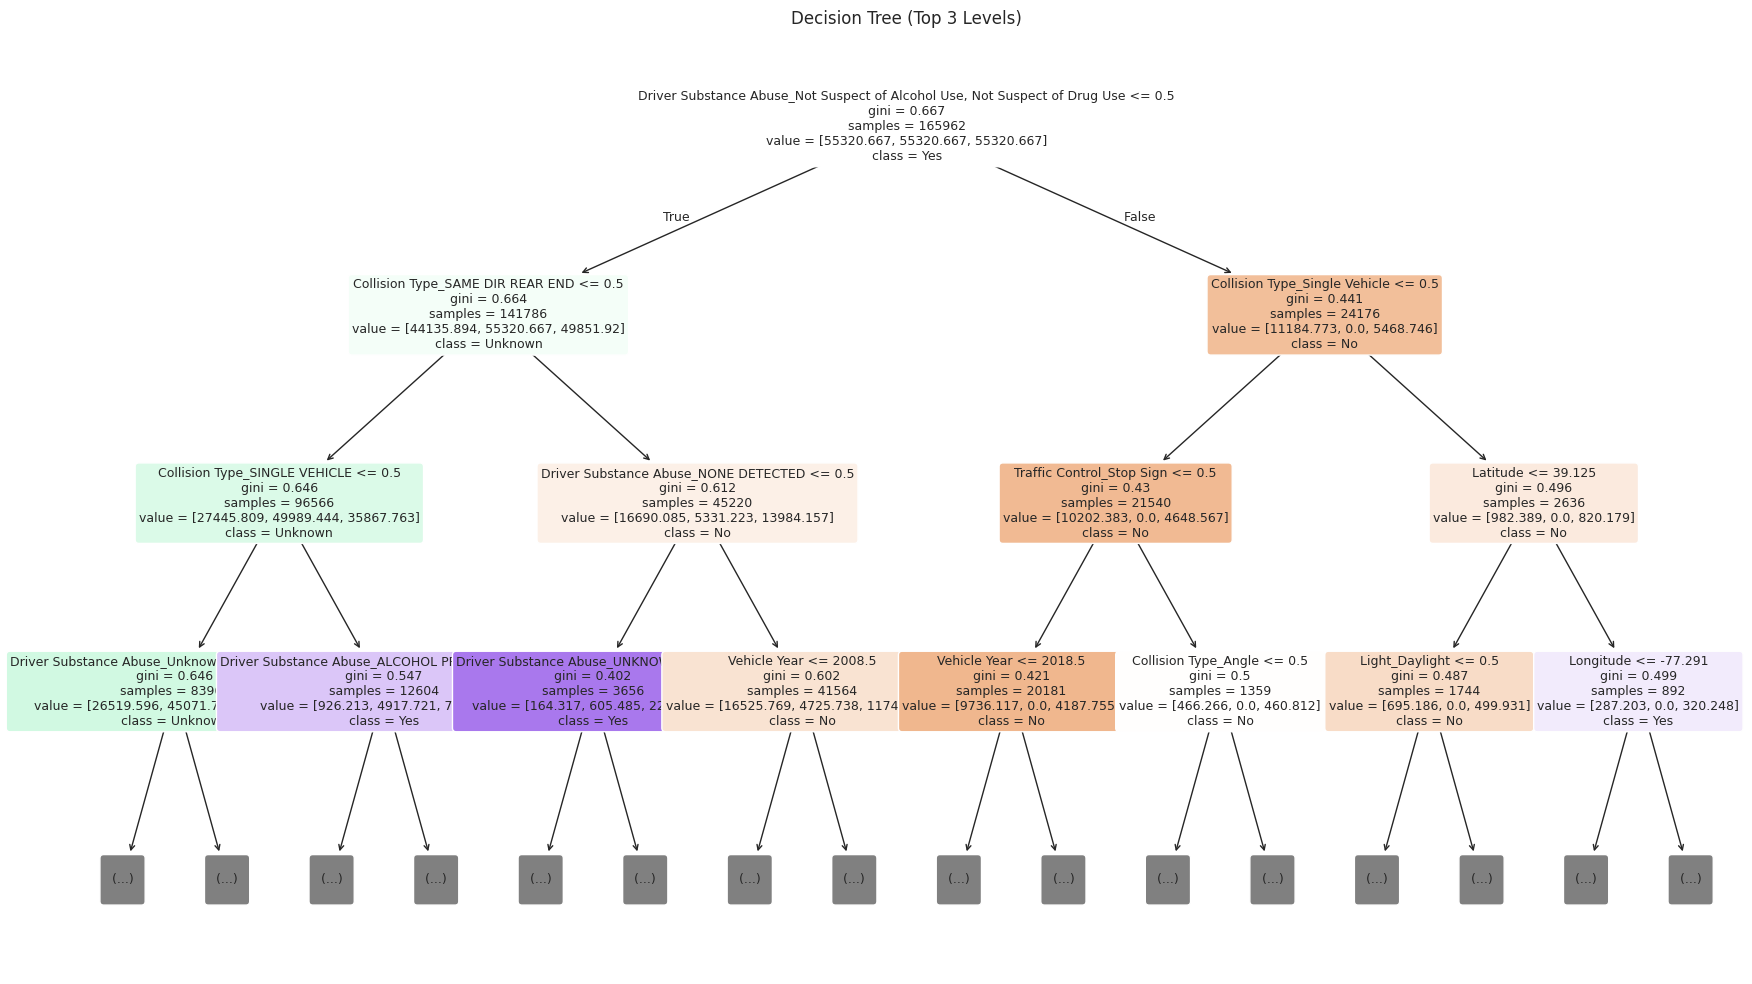

In [ ]:
# Build feature names
pre = dt_model.named_steps["preprocess"]
dt_est = dt_model.named_steps["dt"]

feature_names = []
feature_names.extend(numeric_cols)

if categorical_cols:
    ohe = pre.named_transformers_["cat"].named_steps["onehot"]
    feature_names.extend(ohe.get_feature_names_out(categorical_cols).tolist())

plt.figure(figsize=(18,10))
plot_tree(
    dt_est,
    feature_names=feature_names,
    class_names=[str(c) for c in dt_est.classes_],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=9
)
plt.title("Decision Tree (Top 3 Levels)")
plt.tight_layout()
plt.show()


In [ ]:
#Random Forest

rf = RandomForestClassifier(
    n_estimators=400,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    class_weight="balanced",
    min_samples_leaf=10
)

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", rf)
])

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {acc*100:.2f}%")
print("Random Forest Balanced Accuracy:", balanced_accuracy_score(y_test, rf_pred))
print("Random Forest Macro F1:", f1_score(y_test, rf_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 52.15%
Random Forest Balanced Accuracy: 0.5725882515839904
Random Forest Macro F1: 0.4192813600985275

Classification Report:
               precision    recall  f1-score   support

          No       0.59      0.67      0.63     19696
     Unknown       0.07      0.67      0.13       936
         Yes       0.77      0.37      0.50     20859

    accuracy                           0.52     41491
   macro avg       0.48      0.57      0.42     41491
weighted avg       0.67      0.52      0.55     41491



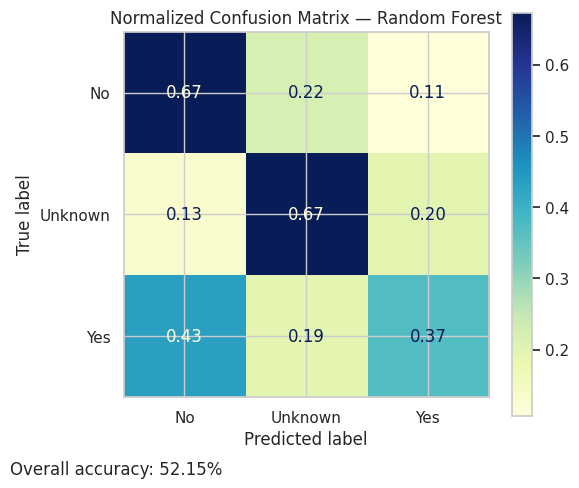

In [ ]:
labels = rf_model.named_steps["rf"].classes_
cm = confusion_matrix(y_test, rf_pred, labels=labels, normalize="true")

fig, ax = plt.subplots(figsize=(6,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax, cmap=plt.cm.YlGnBu, values_format=".2f")
ax.set_title("Normalized Confusion Matrix — Random Forest")
fig.text(0.02, 0.01, f"Overall accuracy: {acc*100:.2f}%")
plt.tight_layout()
plt.show()


Class order: ['No' 'Unknown' 'Yes']
First 5 probability rows:
 [[0.398 0.241 0.361]
 [0.064 0.23  0.706]
 [0.303 0.428 0.269]
 [0.584 0.01  0.407]
 [0.332 0.335 0.333]]


,0
Collision Type_SAME DIR REAR END,0.099244
Latitude,0.071887
Longitude,0.069896
Vehicle Year,0.048352
crash_hour,0.044733
Speed Limit,0.042685
Driver Substance Abuse_NONE DETECTED,0.042673
Collision Type_SINGLE VEHICLE,0.038578
crash_month,0.037938
"Driver Substance Abuse_Not Suspect of Alcohol Use, Not Suspect of Drug Use",0.032084


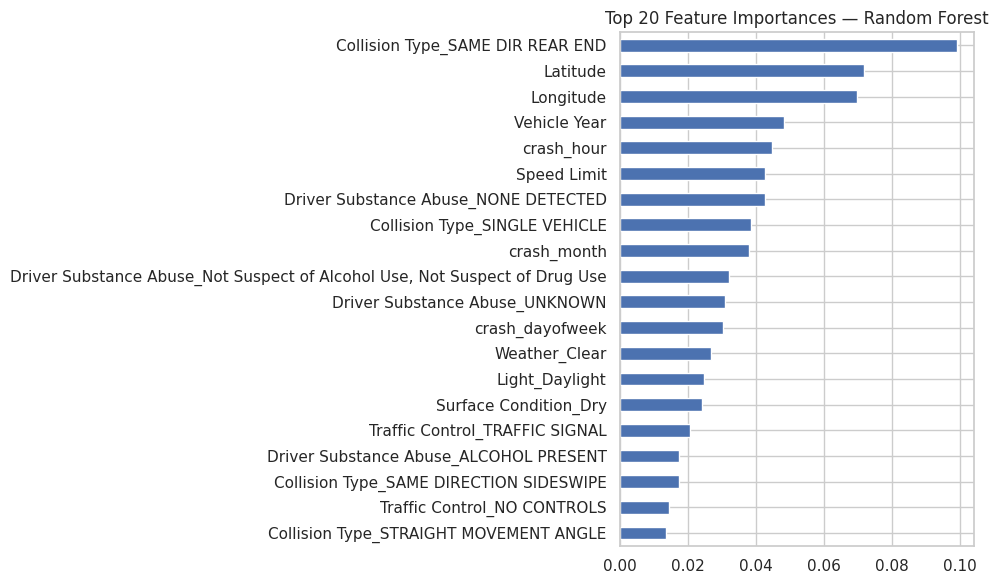

In [ ]:
# Probabilities
proba = rf_model.predict_proba(X_test)
print("Class order:", labels)
print("First 5 probability rows:\n", np.round(proba[:5], 3))

# Feature importance (RF)
pre = rf_model.named_steps["preprocess"]
rf_est = rf_model.named_steps["rf"]

feature_names = []
feature_names.extend(numeric_cols)
if categorical_cols:
    ohe = pre.named_transformers_["cat"].named_steps["onehot"]
    feature_names.extend(ohe.get_feature_names_out(categorical_cols).tolist())

importances = pd.Series(rf_est.feature_importances_, index=feature_names).sort_values(ascending=False)

display(importances.head(20))

plt.figure(figsize=(10,6))
importances.head(20).sort_values().plot(kind="barh")
plt.title("Top 20 Feature Importances — Random Forest")
plt.tight_layout()
plt.show()
